# Laboratorio 1
**Autores**: Harvey Benitez, Estefanía Laverde

In [3]:
!pip install opencv-python --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow # Uncomment if running in colab
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# Save images path
images_path = "drive/MyDrive/Vision por Computadora MISIS/Laboratorios/Taller1/images" # running in colab
images_path = "images/" # running locally
os.listdir(images_path)

['SPOT.png',
 'MUSCLE.png',
 'REGLE.png',
 'BUREAU.png',
 'CLEF.png',
 'ImagenBogota.png',
 'RONDELLE.png',
 'SCANNER.png',
 'Torax.png',
 'AQUITAIN.png']

# 1. Análisis del Histograma

In [4]:
# definimos una función para leer y mostrar las imágenes
def read_and_show_image_gray_scale(image_path:str, colab:bool = False):
    """
    Lee una imagen en escala de grises y la muestra.
    
    Parámetros:
    image_path (str): Ruta de la imagen a leer.
    colab (bool): Indica si se está ejecutando en Google Colab.

    Retorna:
    image (numpy.ndarray): Imagen leída en escala de grises.
    """

    # leer la imagen
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # mostrar la imagen
    if colab:
        from google.colab.patches import cv2_imshow
        cv2_imshow(image)
    else:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()

    return image

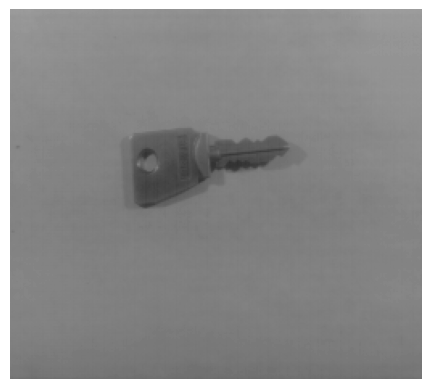

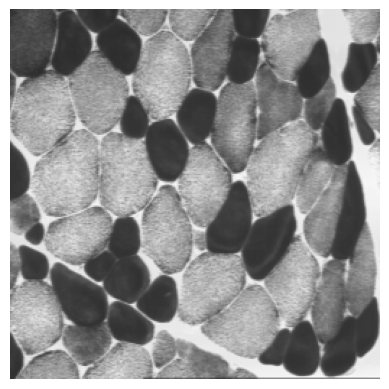

In [20]:
# lectura y carga de las imágenes
image_clef = read_and_show_image_gray_scale(os.path.join(images_path, 'CLEF.png'))

image_muscle = read_and_show_image_gray_scale(os.path.join(images_path, 'MUSCLE.png'))

In [5]:
# definimos una nueva función que calcula el histograma de una imagen
def calculate_histogram(image:np.ndarray, min_val:int = 0, max_val:int = 255, hist_title:str = "") -> np.ndarray:
    """
    Calcula el histograma de una imagen en escala de grises y grafica el resultado.

    Parámetros:
    image (numpy.ndarray): Imagen en escala de grises.
    min_val (int): Valor mínimo para el rango del histograma.
    max_val (int): Valor máximo para el rango del histograma.
    hist_title (str): Título para el gráfico del histograma.

    Retorna:
    histogram (numpy.ndarray): Histograma de la imagen.
    """
    # calcular el histograma
    histogram = cv2.calcHist([image], [0], None, [256], [min_val, max_val + 1])
    
    # plotear el histograma
    plt.plot(histogram)
    plt.xlim([min_val-10, max_val+10])
    if hist_title:
        plt.title(hist_title)
    plt.show()

    return histogram

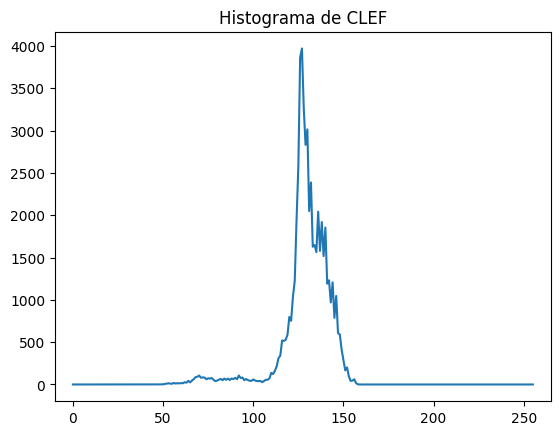

In [41]:
clef_histogram = calculate_histogram(image_clef, hist_title="Histograma de CLEF")

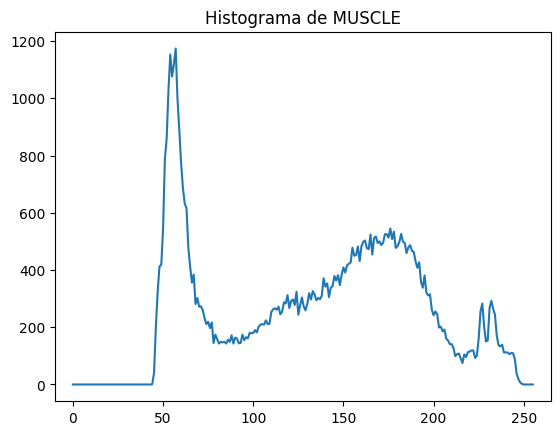

In [42]:
muscle_histogram = calculate_histogram(image_muscle, hist_title="Histograma de MUSCLE")

In [29]:
print(image_clef.shape,image_muscle.shape)

(230, 256) (256, 256)


- Explique las formas de cada uno de estos histogramas.
  
  El histograma muestra la distribución de los niveles de intensidad de píxeles en las imagenes, donde el eje $x$ indica los valores de intensidad (de 0 a 255 para imágenes en escala de grises) y el eje $y$ representa la cantidad de píxeles que tienen cada valor de intensidad.

  En la imagen CLEF, el histograma muestra una distribución muy concentrada entre los valores 100 y 150 aproximadamente, indicando que la gran mayoría de los píxeles tienen intensidades en este rango, sugiriendo que la imagen es predominante en tonos grises medios. Como se puede observar en la imagen original, el área predominante es el fondo gris, y la figura de la llave tiene también tonos grises ligeramente más oscuros, lo cual se puede ver reflejado en el histograma entre los valores 70 y 100 aproximadamente.

  Por otro lado, en la imagen MUSCLE, el histograma muestra una distribución más amplia, con una cantidad significativa de pixeles en valores oscuros (pico cercano a 50), una distribución considerable en tonos no extremos (entre 90 a 200 aproximadamente) y un pequeño pico en los valores más claros (cerca de 220-230 aproximadamente). Esto indica que la imagen tiene una mayor variedad de tonos, que se puede ver en las fibras de tono gris, un pico en valores oscuros debido a las fibras más oscuras y el pequeño pico en valores claros debido principalmente al fondo blanco de la imagen.

- Observando únicamente el histograma de muscle.png, ¿cómo se puede determinar cuáles fibras musculares son más densas (ocupan una superficie más grande en la imagen) entre las rojas (oscuras) y las blancas (grises)? Y ¿cuáles fibras tienen un color más uniforme (más homogéneo)?

  Observando únicamente el histograma y teniendo en cuenta la descripción previa, las fibras musculares que ocupan una mayor superficie en la imagen son las fibras de tonos grises (blancas), pues a pesar de que hay un pico en los valores oscuros (fibras rojas), la distribución en los tonos medios (grises) es más amplia y tiene una mayor cantidad de píxeles en comparación con los tonos oscuros. Esto sugiere que las fibras musculares de tonos grises son más densas en la imagen.

  En cuanto a la uniformidad del color, las fibras musculares oscuras (rojas) parecen tener un color más uniforme, pues su distribución en el histograma se concentra en un rango más estrecho de valores, cercanos a 50. En contraste, las fibras musculares de tonos grises (blancas) tienen una distribución más amplia en el histograma, lo que indica una mayor variabilidad en los tonos presentes en esas fibras.
---

# 2. Operaciones aritméticas

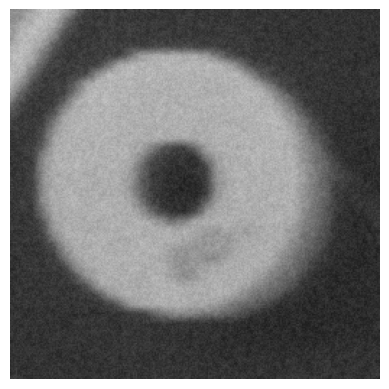

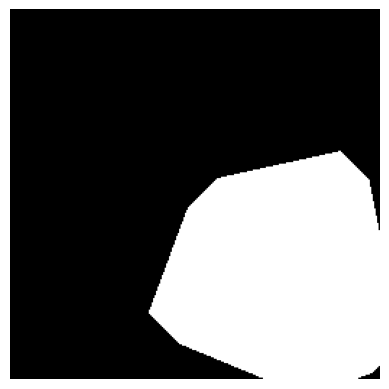

In [30]:
rondelle_image = read_and_show_image_gray_scale(os.path.join(images_path, 'RONDELLE.png'))
spot_image = read_and_show_image_gray_scale(os.path.join(images_path, 'SPOT.png'))

In [31]:
# comprobamos que las imagenes leídas sean de 8 bits
print(rondelle_image.dtype, spot_image.dtype)

uint8 uint8


In [32]:
# pasamos las imágenes a 16 bits haciendo una conversión
rondelle_image_16bit = rondelle_image.astype(np.uint16)
spot_image_16bit = spot_image.astype(np.uint16)

# comprobamos que las imagenes convertidas sean de 16 bits
print(rondelle_image_16bit.dtype, spot_image_16bit.dtype)

uint16 uint16


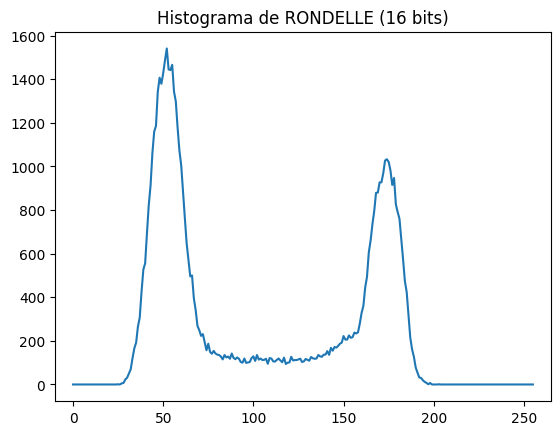

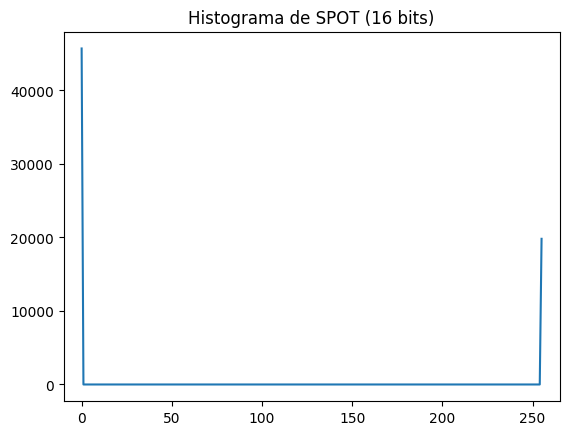

In [43]:
# visualizamos el histograma de ambas imagenes de 16 bits
rondelle_histogram_16bit = calculate_histogram(rondelle_image_16bit, hist_title="Histograma de RONDELLE (16 bits)")

# visualizamos el histograma de spot
spot_histogram_16bit = calculate_histogram(spot_image_16bit, hist_title="Histograma de SPOT (16 bits)")

- Explique las formas de cada uno de estos histogramas.

    El histograma referente a la imagen RONDELLE (16 bits) muestra dos concentraciones principales de píxeles: una en valores cercanos a 50 (oscuros) y otra en valores cercanos a 170 aproximadamente (claros), siendo predominantes los valores oscuros. Observando la imagen original, se puede ver que los valores claros corresponden a la figura redonda de tono más claro, y los valores oscuros al fondo en el que está la figura. Además, hay un ruido ligeramente visible en la imagen, que se refleja en el histograma como una dispersión de valores entre los picos principales.

    En el caso del histograma de la imagen SPOT (16 bits),hay únicamente dos valores de intensidad predominantes: uno en el color negro (0) y otro en blanco (255), indicando que la imagen tiene únicamente dos tonos en todos los pixeles. Esto se puede observar en la imagen, pues se tiene únicamente un fondo completamente negro y una mancha completamente blanca.

    Como nota adicional, al realizar la conversión incrementando los bits de 8 a 16, los valores de intensidad no fueron afectados, pero el máximo de intensidades puede ser incrementado hasta 65536.

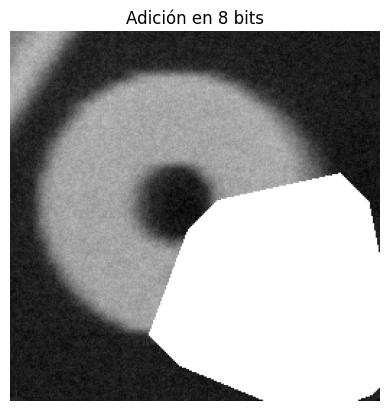

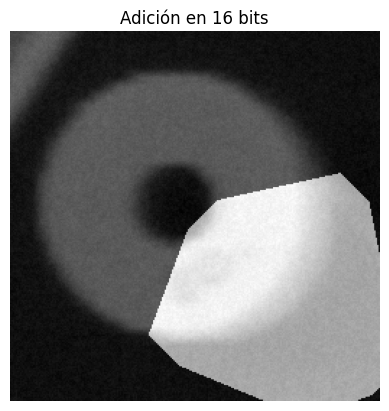

In [48]:
# Adicionando rondelle a spot en 8 bits y en 16 bits
addition = cv2.add(rondelle_image, spot_image)

plt.imshow(addition, cmap='gray')
plt.title("Adición en 8 bits")
plt.axis('off')
plt.show()

addition_16bit = cv2.add(rondelle_image_16bit, spot_image_16bit)

plt.imshow(addition_16bit, cmap='gray')
plt.title("Adición en 16 bits")
plt.axis('off')
plt.show()

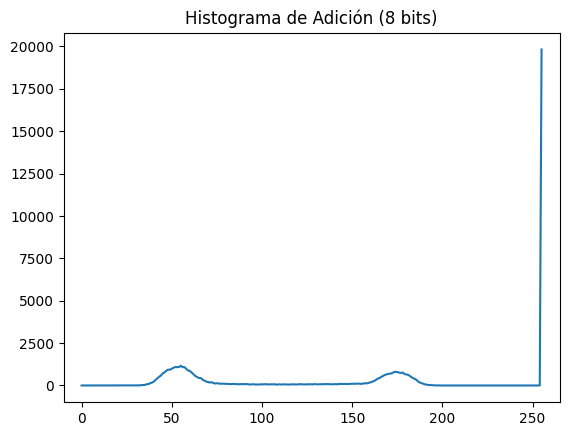

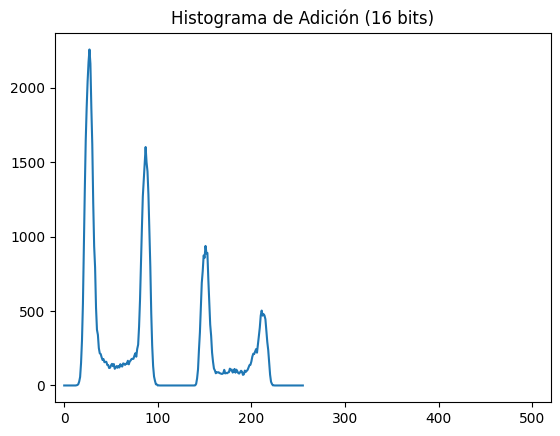

In [50]:
# visualizamos los histogramas de las imagenes resultantes de adición
addition_histogram = calculate_histogram(addition, hist_title="Histograma de Adición (8 bits)")
addition_16bit_histogram = calculate_histogram(addition_16bit, hist_title="Histograma de Adición (16 bits)", min_val=0, max_val=255*2)

- Justifique los valores de los niveles de gris de esta imagen. 

    El resultado de la operación adición se obtiene sumando los valores de intensidad entre pixeles en las mismas posiciones entre ambas imágenes. Teniendo en cuenta que la imagen SPOT tiene únicamente como valores de intensidad el negro (0) y el blanco (255), el resultado actúa de forma distinta según la profunidad de bits de las imagenes. En 8 bits, cualquier suma que supere el valor de 255 se trunca automáticamente a este límite, generando que la mancha blanca de la imagen SPOT se vea en la suma, y el resto de la imagen queda igual a RONDELLE pues se le está sumando 0. En cambio, en 16 bits, el límite máximo se extiende hasta 65535, luego la suma de intensidades no se verá truncada. Esto hace que la suma obtenida tome tonos claros nuevos, sin llegar al punto de truncamiento, y manteniendo las figuras originales de la imagen RONDELLE.
    Estos resultados se pueden también observar en los histogramas de las imagenes, teniendo para 8 bits un nuevo pico en los tonos blancos (255) debido al truncamiento, y reduciendo el numero de pixeles que estaban en la distribución del histograma de la imagen original. En el caso de los 16 bits, se observa como aparecen dos nuevos picos, trasladando algunos de los pixeles correspondientes a la mancha blanca de SPOT a nuevos tonos claros, sin llegar al truncamiento.

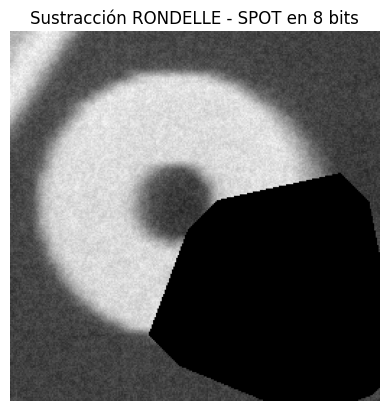

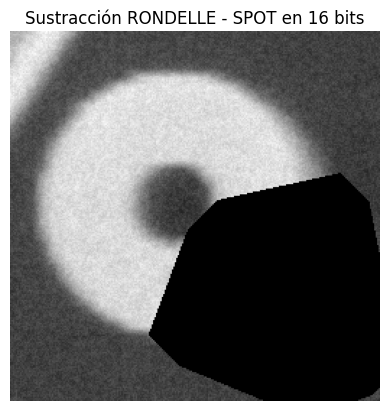

In [56]:
# Sustracción rondelle - spot en 8 bits y en 16 bits
subtract_rondelle_minus_spot = cv2.subtract(rondelle_image, spot_image)

plt.imshow(subtract_rondelle_minus_spot, cmap='gray')
plt.title("Sustracción RONDELLE - SPOT en 8 bits")
plt.axis('off')
plt.show()

subtract_rondelle_minus_spot_16bit = cv2.subtract(rondelle_image_16bit, spot_image_16bit)
plt.imshow(subtract_rondelle_minus_spot_16bit, cmap='gray')
plt.title("Sustracción RONDELLE - SPOT en 16 bits")
plt.axis('off')
plt.show()

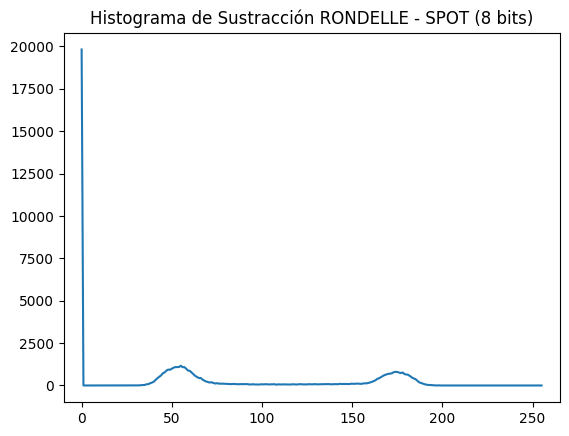

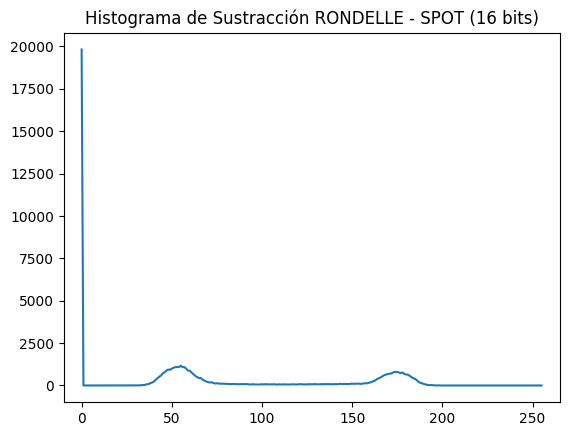

In [57]:
# visualizamos el histograma de ambas imagenes al hacer la sustracción
subtract_histogram = calculate_histogram(subtract_rondelle_minus_spot, hist_title="Histograma de Sustracción RONDELLE - SPOT (8 bits)")
subtract_16bit_histogram = calculate_histogram(subtract_rondelle_minus_spot_16bit, hist_title="Histograma de Sustracción RONDELLE - SPOT (16 bits)", min_val=0, max_val=255)

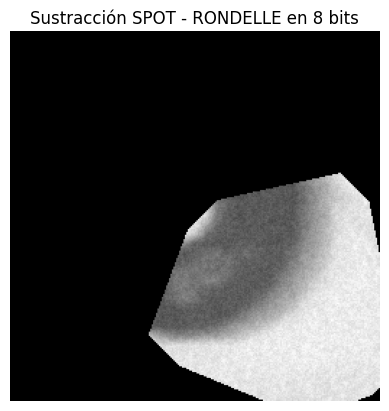

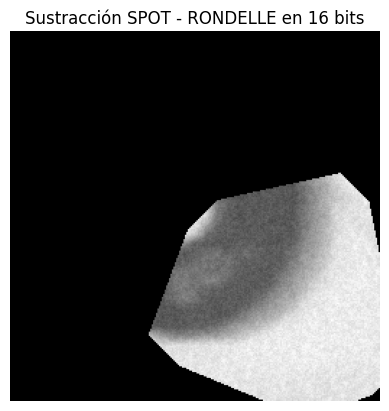

In [58]:
# Sustracción SPOT - RONDELLE en 8 bits y en 16 bits
subtract_spot_minus_rondelle = cv2.subtract(spot_image, rondelle_image)

plt.imshow(subtract_spot_minus_rondelle, cmap='gray')
plt.title("Sustracción SPOT - RONDELLE en 8 bits")
plt.axis('off')
plt.show()

subtract_spot_minus_rondelle_16bit = cv2.subtract(spot_image_16bit, rondelle_image_16bit)
plt.imshow(subtract_spot_minus_rondelle_16bit, cmap='gray')
plt.title("Sustracción SPOT - RONDELLE en 16 bits")
plt.axis('off')
plt.show()

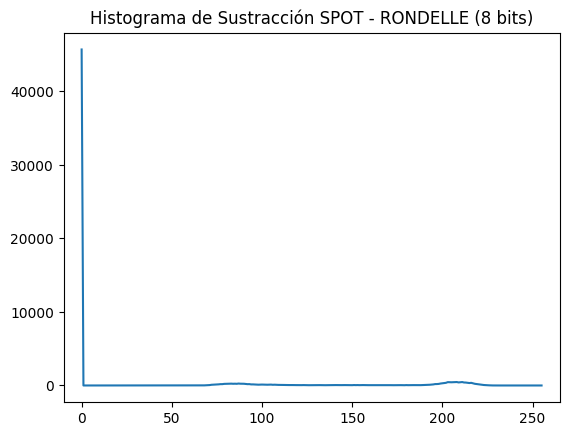

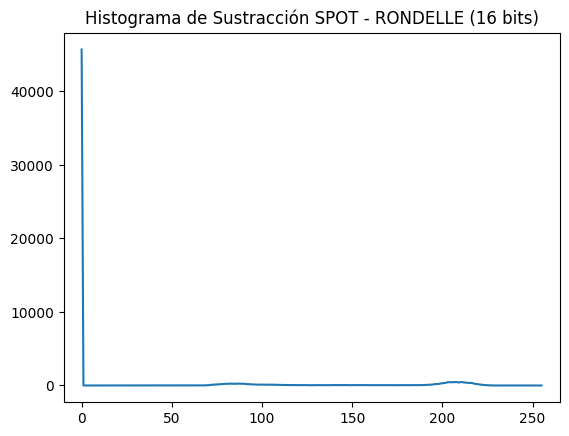

In [59]:
# visualizamos el histograma de ambas imagenes al hacer la sustracción
subtract_histogram = calculate_histogram(subtract_spot_minus_rondelle, hist_title="Histograma de Sustracción SPOT - RONDELLE (8 bits)")
subtract_16bit_histogram = calculate_histogram(subtract_spot_minus_rondelle_16bit, hist_title="Histograma de Sustracción SPOT - RONDELLE (16 bits)", min_val=0, max_val=255)

- ¿Cómo afecta al resultado la inversión de los operandos?

    Al invertir los operandos en la operación de sustracción, se produce un efecto de selección u omisión de áreas en la imagen resultante. Cuando a RONDELLE se le resta SPOT, los píxeles correspondientes a la mancha blanca de spot (valor 255) se truncan en 0 en la imagen resultate, obteniendo una mancha negra en la posición correspondiente, mientras que el resto de la imagen permanece igual a RONDELLE. Por otro lado, cuando a SPOT se le resta RONDELLE, el fondo negro de SPOT (valor 0) resta cualquier valor de RONDELLE y queda truncado en 0, obteniendo el mismo fondo negro, mientras que a la mancha blanca (valor 255) se le restan los valores de intensidad de la imagen RONDELLE, obteniendo un cambio en los tonos tornandose más claros, pero conteniendo la figura de RONDELLE.

    En los histogramas se puede visualizar como hay grandes cantidades de tonos negros (0) en ambas operaciones, siendo mayores en la operación SPOT-RONDELLE. Además, se puede observar ese cambio de tonos a valores más claros mencionado sobre la operación SPOT-RONDELLE, pues hay dos pequeños picos que fueron movidos hacia valores más altos al compararlos con el histograma de la imagen RONDELLE original.

    Es importante notar que al estar restando, el valor mínimo tanto para 8 bits como para 16 bits es de 0, por lo que se observan los mismo resultados en ambas situaciones.

- Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?

    Conociendo únicamente los histogramas de la imagen y no las imagenes en si no es posible prever el histograma de la imagen tras las operaciones aritmeticas, pued carecen de información espacial, dado que el histograma indica una frecuencia o distribución de cada nivel de gris pero no la ubicación de los pixeles dentro de la imagen. Como las operaciones aritméticas se realizan pixel a pixel según su posición, el resultado final depende de esa disposición espacial. Por ejemplo, sumar un tonos claros puede llegar a truncarse, pero si se suma un tono claro con un tono oscuro, se creará un nuevo tono intermedio.

---   


# 3. Negativo


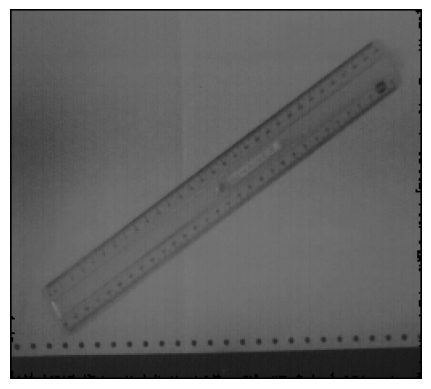

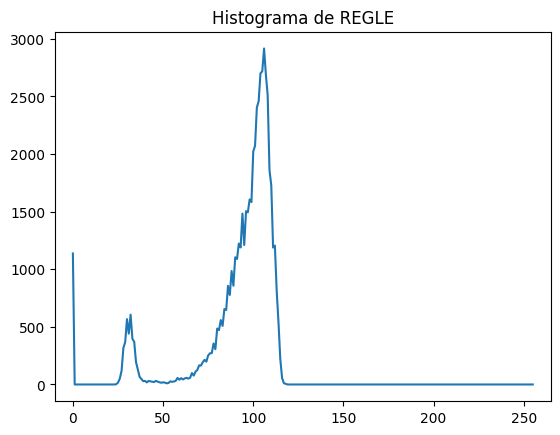

In [60]:
# visualización de la imagen y del histograma
image_regle = read_and_show_image_gray_scale(os.path.join(images_path, "REGLE.png"))
regle_histogram = calculate_histogram(image_regle, hist_title="Histograma de REGLE")

- Explicación del histograma.

    El histograma de la imagen REGLE muestra una importante cantidad de tonos negros (0) que se puede observar en los bordes de la imagen. Hay otros dos picos, uno en tonos cercanos a 30 (más pequeño) que puede deberse al fondo en el que se encuentra la hoja de papel en la imagen, y uno más grande y más distribuido alrededor de 100 que indica tonos grises oscuros. Se puede notar que los valores entre 50 y 100 aproximadamente están más distribuidos en los pixeles que de 100 a 120 aproximadamente, lo cual se podría explicar por la sombra de tonos más oscuros que crea la regla en la hoja.

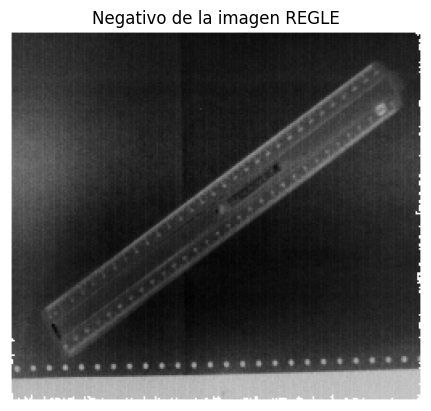

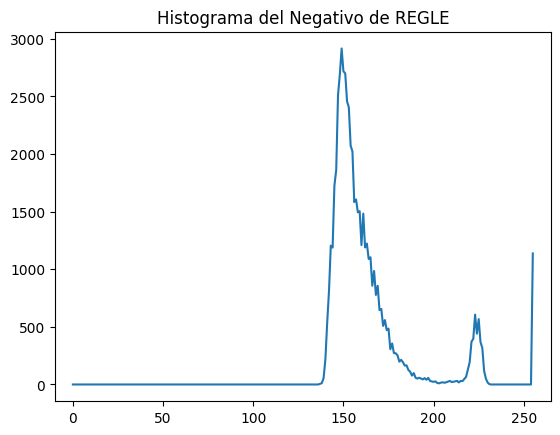

In [64]:
# Negativo de la imagen
negative_regle = cv2.bitwise_not(image_regle)

plt.imshow(negative_regle, cmap='gray')
plt.title("Negativo de la imagen REGLE")
plt.axis('off')
plt.show()

# histogrtama del negativo
negative_regle_histogram = calculate_histogram(negative_regle, hist_title="Histograma del Negativo de REGLE")

- ¿Cómo es este histograma con respecto al de la imagen original?
  
    La operación bitwise_not transforma el valor de intensidad de cada píxel $I$ en un nuevo valor $255-I$, por lo que valores que estaban en el extremo oscuro se desplazan al extremo claro, y viceversa. Al analizar ambos histogramas, se puede ver una reflexión en el eje horizontal sobre el valor 127.5 (que es la mitad de 255).

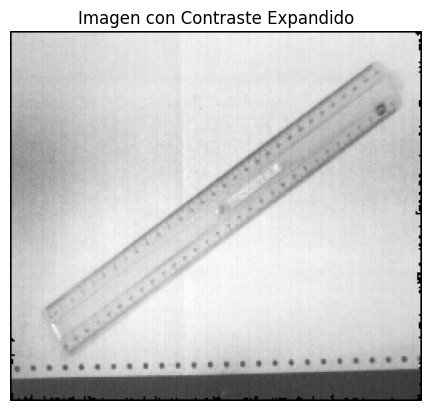

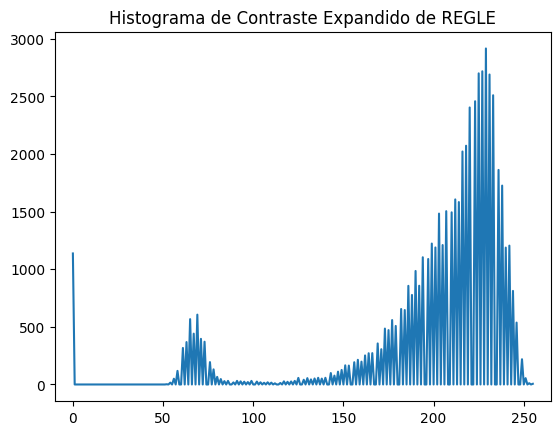

In [67]:
# Expansión del histograma - contraste
# consiste en remapear los valores de la imagen para que ocupen todo el rango posible (0-255 para 8 bits)

# expansion de la imagen original
expanded_contrast_regle = cv2.normalize(image_regle, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.imshow(expanded_contrast_regle, cmap='gray')
plt.title("Imagen con Contraste Expandido")
plt.axis('off')
plt.show()

# histograma del contraste expandido
expanded_contrast_histogram = calculate_histogram(expanded_contrast_regle, hist_title="Histograma de Contraste Expandido de REGLE")

- Explique el resultado.

    Al hacer una expansión del histograma, se remapean los valores de intensidad de la imagen para que ocupen todo el rango posible (0-255 para 8 bits). Esto se logra identificando los valores mínimo y máximo de intensidades en la imagen original, y luego transformandolos de la siguiente manera:

    $$I_{new} = \frac{(I - I_{min})}{(I_{max} - I_{min})} \cdot 255$$

    De forma que el valor mínimo se convierte en 0 y el máximo en 255, y los demás valores se distribuyen linealmente entre estos extremos.

    En el histograma resultante se puede observar que los valores de intensidad ocupan todo el rango de 0 a 255, a diferencia del histograma original, que estaba concentrado sobre el lado oscuro, pero mantiene la misma forma general de distribución, indicando que la relación entre los tonos se ha mantenido, pero ahora con un mayor contraste visual en la imagen.

---

# 4. Cuantificación

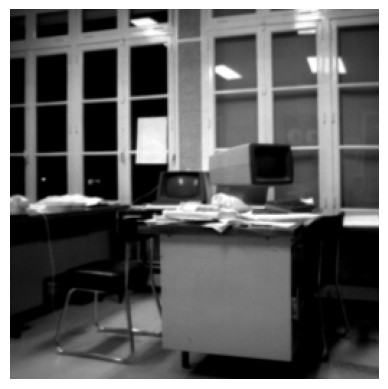

uint8


In [12]:
# leer y visualizar la imagen
image_bureau = read_and_show_image_gray_scale(os.path.join(images_path, "BUREAU.png"))

# comprobar que la imagen tiene 8 bits
print(image_bureau.dtype)

Plano 0


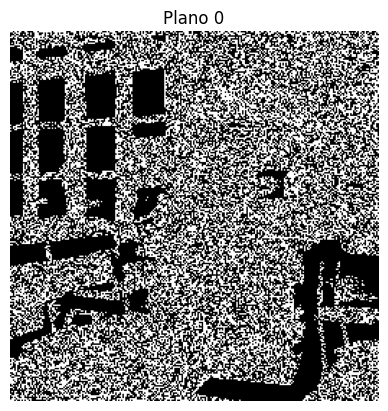

Plano 1


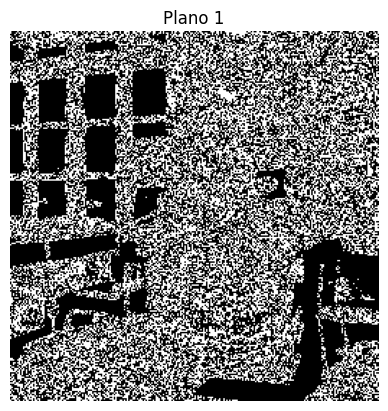

Plano 2


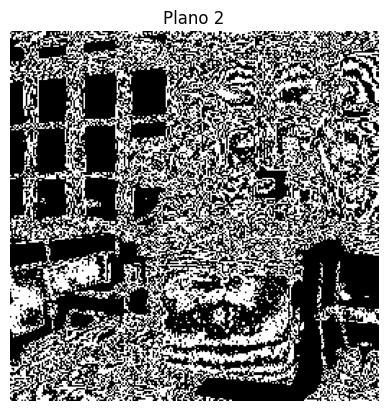

Plano 3


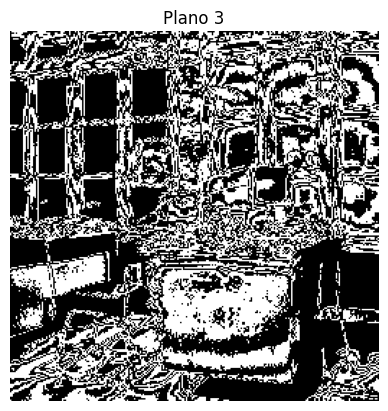

Plano 4


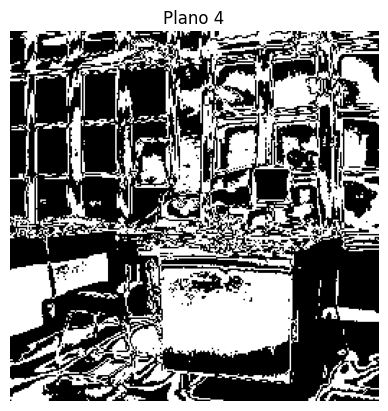

Plano 5


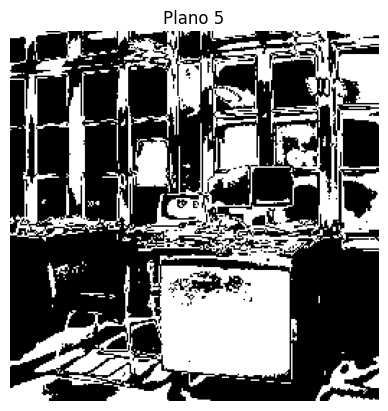

Plano 6


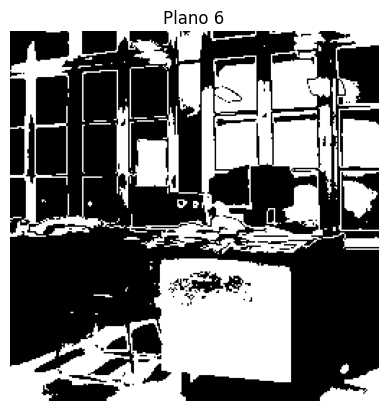

Plano 7


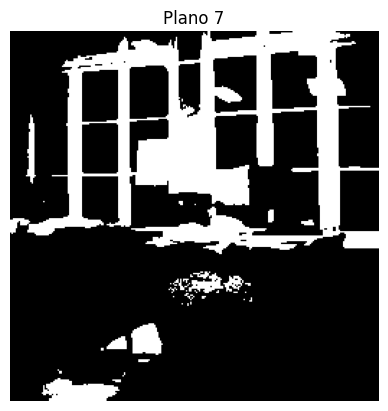

In [13]:
# visualización de los planos binarios
def bit_plane_slicing(imagen: np.ndarray, k: int):
    # crear una nueva matriz tamaño de la imagen original, llena con el valor 2**k, equivalente a llenar de ceros todos los bits excepto el k-ésimo

    # nota: k va de 0 a 7, siendo 0 el bit menos significativo y 7 el más significativo
    plane = np.full((imagen.shape[0], imagen.shape[1]), 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

for i in range(8):
    print(f"Plano {i}")
    plane = bit_plane_slicing(image_bureau, i)
    plt.imshow(plane, cmap='gray')
    plt.title(f"Plano {i}")
    plt.axis('off')
    plt.show()

- Identifique el plano más significativo y el menos significativo. ¿Cuál es su conclusión?

    El plano menos significativo es el plano 0 (el de menor peso), ya que en este plano se observa una imagen con mucho ruido y poca información relevante. A medida que se avanza hacia planos de mayor peso, siendo 7 el plano más significativo, la imagen se vuelve más clara, mostrando los contornos y detalles principales de la imagen original, en este caso siendo los contornos de ventanas, muebles y una figura cercana a la ventana izquierda. Esto indica que los planos de mayor peso contienen la mayor parte de la información visual relevante de la imagen.

Bits a poner en cero: 3


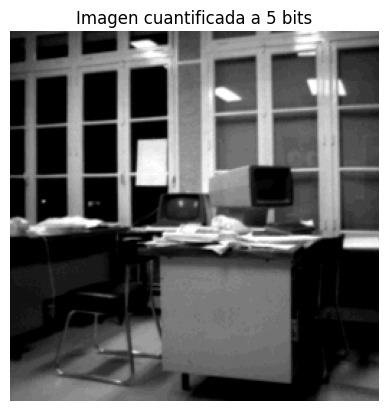

Bits a poner en cero: 5


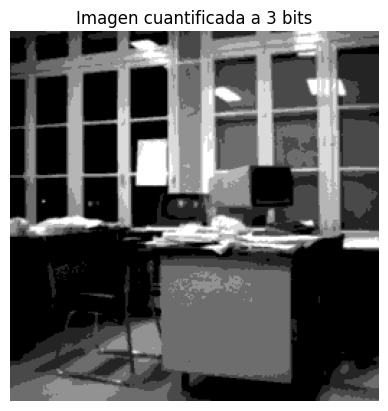

Bits a poner en cero: 7


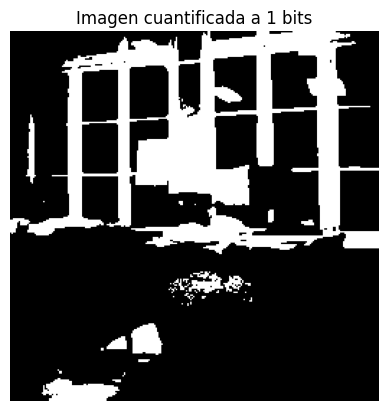

In [14]:
# modificar la cuantificación de la imagen
def image_quantization(imagen: np.ndarray, k: int):
    # funcion capaz de poner en cero el plano binario k de una imagen de 8 bits

    # primero se crea una nueva matriz tamaño de la imagen original, llena con el valor 255 - 2**k, equivalente a poner en cero el bit k-ésimo
    plane = np.full((imagen.shape[0], imagen.shape[1]), 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

# modificar la cuantificación de la imagen sobre 5, 3 y 1 bits respectivamente
num_bits = [5, 3, 1]
for bits in num_bits:
    bureau_copy = image_bureau.copy()
    colocar_en_cero = 8 - bits
    print("Bits a poner en cero:", colocar_en_cero)

    for i in range(colocar_en_cero): # coloca en cero los 8-k bits menos significativos
        bureau_copy = image_quantization(bureau_copy, i)

    plt.imshow(bureau_copy, cmap='gray')
    plt.title(f"Imagen cuantificada a {bits} bits")
    plt.axis('off')
    plt.show()

- Conclusiones cuantificación.

    Al reducir la cuantificación de la imagen, se hace evidente que la información visual está distribuida de manera desigual entre los diferentes planos binarios, siendo lo planos más significativos los que contienen la mayor parte de la información, preservando estructuras y detalles importantes de la imagen original, mientras que los planos menos significativos contribuyen principalmente a la riqueza tonal y detalles finos. Al eliminar estos últimos de forma progresiva, la imagen va perdiendo calidad visual. Podemos notar como la cuantificación a 3 bits aún conserva una imagen reconocible, con una perdida de detalles y creando fronteras imaginarias entre tonos, pues se obliga a niveles de gris cercanos a colapsar en un mismo valor. 
    En el caso de la cuantificación a 1 bit, la imagen se reduce a una representación binaria muy básica, donde solo se distinguen las áreas más claras y más oscuras, perdiendo casi toda la información visual relevante.

---

# 5. Operaciones lógicas

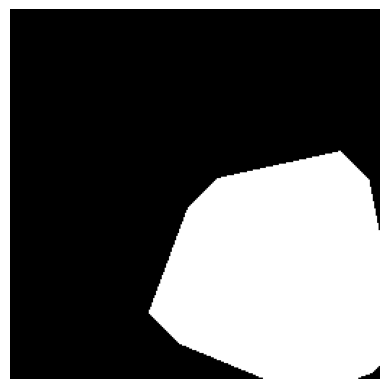

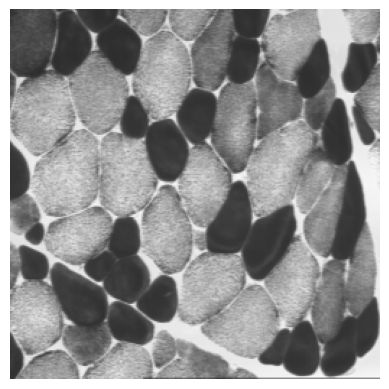

In [7]:
# cargar imagenes spot y muscle
spot_image = read_and_show_image_gray_scale(os.path.join(images_path, 'SPOT.png'))
muscle_image = read_and_show_image_gray_scale(os.path.join(images_path, 'MUSCLE.png'))

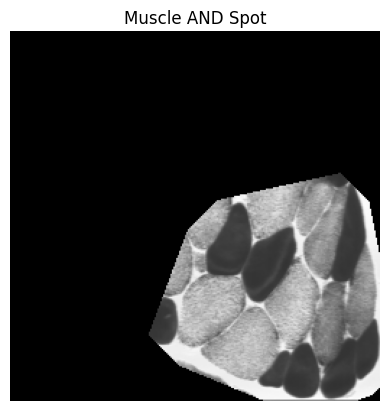

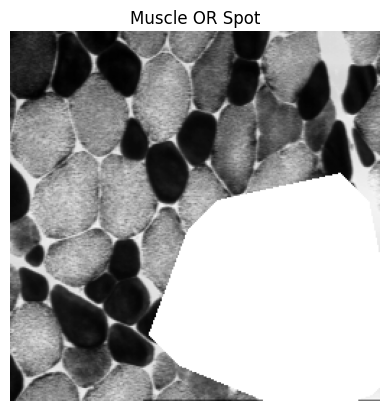

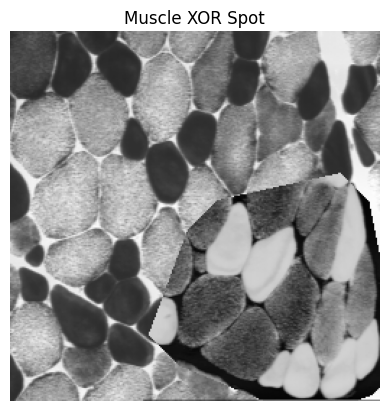

In [8]:
# aplicar las operaciones lógicas AND, OR y XOR entre las dos imágenes
# primera parte: muscle - spot
muscle_and_spot = cv2.bitwise_and(muscle_image, spot_image)
muscle_or_spot = cv2.bitwise_or(muscle_image, spot_image)
muscle_xor_spot = cv2.bitwise_xor(muscle_image, spot_image)

# mostrar resultados
operations = {
    "AND": muscle_and_spot,
    "OR": muscle_or_spot,
    "XOR": muscle_xor_spot
}

for op_name, result_image in operations.items():
    plt.imshow(result_image, cmap='gray')
    plt.title(f"Muscle {op_name} Spot")
    plt.axis('off')
    plt.show()

- ¿Cuál es su conclusión?

    Las funciones lógicas operan comparando los valores binarios de los pixeles en la misma posición. En este caso, al ser SPOT una imagen binaria (solo valores 0 y 255, equivalente a tener ocho bits con valores 00000000 y 11111111 respectivamente), las operaciones lógicas con MUSCLE generan unos tipos de máscaras específicas:

    - MUSCLE AND RONDELLE: Esta operación mantiene los valores de muscle donde SPOT es blanco, pues al tener todos los bits en 1 en esos píxeles, el resultado es igual al valor de MUSCLE. En el resto de la imagen, donde spot es negro, el resultado es negro, pues el valor 0 con cualquier otro en un AND lo vuelve 0.
    - MUSCLE OR RONDELLE: en la operación OR basta co que alguno de los bits sea 1 para que el resultado sea 1. De esta manera, si cualquiera de los dos pixeles de entrada es blanco, el resultado será blanco, como se ve en la imagen. En el área donde SPOT es negro, el resultado sera el mismo que los bits originales de la imagen MUSCLE, pues en sí no se está teniendo ningún cambio al hacer OR con 0s.
    - MUSCLE XOR RONDELLE: en la operación XOR, el valor es 1 si alguno de los dos bits es 1, pero no ambos. Por esta razón, en el fondo negro de SPOT donde todos los bits son 0, el resultado va a ser exactamente a los bits de MUSCLE, pero en la mancha blanca se crea una especie de inversión de los grises, cambiando de 0 a 1 y de 1 a 0 los bits de MUSCLE.

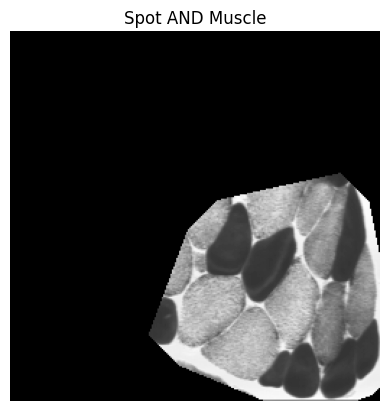

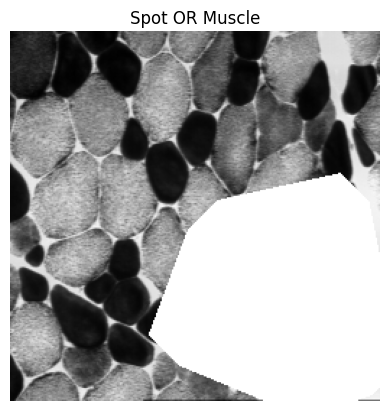

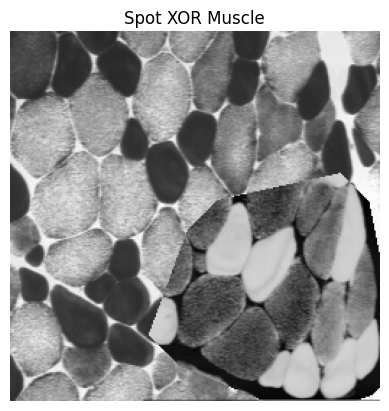

In [101]:
# segunda parte: spot - muscle
spot_and_muscle = cv2.bitwise_and(spot_image, muscle_image)
spot_or_muscle = cv2.bitwise_or(spot_image, muscle_image)
spot_xor_muscle = cv2.bitwise_xor(spot_image, muscle_image)

# mostrar resultados
operations = {
    "AND": spot_and_muscle,
    "OR": spot_or_muscle,
    "XOR": spot_xor_muscle
}

for op_name, result_image in operations.items():
    plt.imshow(result_image, cmap='gray')
    plt.title(f"Spot {op_name} Muscle")
    plt.axis('off')
    plt.show()

- Explique los resultados.

    Se puede observar que el resultado de las operaciones lógicas no se altera con el orden en el que se tomen las imagenes. Esto es devido a que en estas tres operaciones lógicas se cumple la propiedad conmutativa. A diferencia de las operaciones como resta o suma, donde pudimos observar que el orden en el que se realizan afecta el resultado.

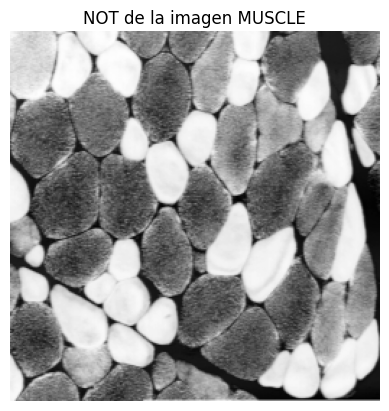

In [9]:
# aplique la operación NOT sobre la imagen MUSCLE
# se puede realizar a través de la operación XOR con una imagen contraste de valor máximo 255 y se efectúa XOR con la imagen original

# crear una imagen de valor 255 del mismo tamaño que MUSCLE
constant_image = np.full(muscle_image.shape, 255, dtype=np.uint8)

# aplicar la operación XOR con MUSCLE
muscle_not = cv2.bitwise_xor(muscle_image, constant_image)

plt.imshow(muscle_not, cmap='gray')
plt.title("NOT de la imagen MUSCLE")
plt.axis('off')
plt.show()

- Explique el resultado.

    Primero, entendamos lo que hace la función XOR con la imagen constante:
    - Si el bit de muscle es 1 -> 1 XOR 1 = 0
    - Si el bit de muscle es 0 -> 0 XOR 1 = 1

    De esta manera, lo que estamos haciendo es exactamente NOT bit de MUSCLE.
    En términos de la imagen podemos observar que se hacer una inversión en tonos, cambiando los tonos claros a oscuros y viceversa, que es exactamente lo que se obtendría al sacar el negativo de la imagen MUSCLE.


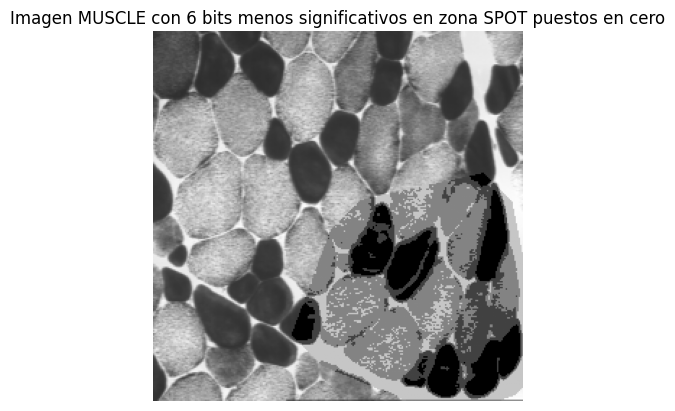

Valores únicos en la zona marcada por SPOT: [  0  64 128 192]


In [15]:
# Ponga en cero en la imagen MUSCLE los 6 bits menos significativos de la zona marcada por SPOT, sin afectar el resto de la imagen.
# verifique que en la imagen resultado, la zona marcada solo toma los cuatro valores 192, 128, 64 y 0.

# primero debemos crear una máscara que seleccione la zona marcada por SPOT en MUSCLE
# esto lo podemos hacer utilizando la operación AND entre MUSCLE y SPOT
mask = cv2.bitwise_and(muscle_image, spot_image)

# a la mascara resultante le ponemos en cero los 6 bits menos significativos
mask_cuantified = mask.copy()
for i in range(6):
    mask_cuantified = image_quantization(mask_cuantified, i)

# seleccionamos la zona de MUSCLE que no está marcada por SPOT, aplicando NOT a SPOT y luego AND con MUSCLE
unchanged_muscle_zone = cv2.bitwise_and(muscle_image, cv2.bitwise_not(spot_image))

# combinamos ambas zonas para obtener la imagen final. Como las zonas no marcadas tienen 0s, se puede hacer con una operación OR
final_image = cv2.bitwise_or(mask_cuantified, unchanged_muscle_zone)

# mostrar la imagen final
plt.imshow(final_image, cmap='gray')
plt.title("Imagen MUSCLE con 6 bits menos significativos en zona SPOT puestos en cero")
plt.axis('off')
plt.show()

# verificar los valores únicos en la zona marcada por SPOT
unique_values = np.unique(final_image[spot_image == 255])
print("Valores únicos en la zona marcada por SPOT:", unique_values)

- Explique el cómo se hace esto.

    Para lograr poner en cero los 6 bits menos significativos de la zona marcada por SPOT, se puede considerar como dividir la imagen MUSCLE en dos regiones: la región dentro de la mancha blanca de SPOT y la región fuera de ella. Para obtener la región dentro de la mancha, la cual se quiere modificar, basta con aplicar la operación AND entre MUSCLE y SPOT, pues todo dentro de lo blanco (bits en 1 en spot) se mantendrán. Para obtener la región fuera de la mancha tal que el resto de la imagen quede en negro, se puede aplicar la operación AND entre MUSCLE y la negación de SPOT (NOT SPOT), pues en esta operación, los bits en 0 de NOT SPOT son el fondo tras la mancha.

    Habiendo separado las dos zonas, se aplica la cuantificación sobre la zona dentro de la mancha colocando en 0 los bits 1 a 6. Con ambos resultados, lo que falta hacer es una "combinación de ambos". Recordando que las zonas no seleccionadas en cada uno quedan en 0, para que se tomen los bits de ambas zonas se puede aplicar una operación OR.

    ---


# 6. Interpolación


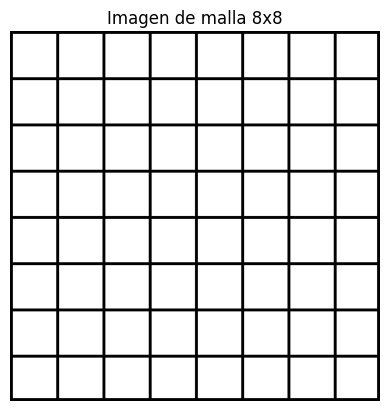

Dimensiones de la imagen de malla: (256, 256)


In [10]:
# generar una imagen de 256x256x1 con una malla 8x8
grid_image = np.full((256, 256), 255, dtype=np.uint8)
quadrant_size = 256//8

for i in range(0, 257, quadrant_size):
    pos = min(i, 254)

    grid_image[pos:pos+2, :] = 0
    grid_image[:, pos:pos+2] = 0

plt.imshow(grid_image, cmap='gray')
plt.title("Imagen de malla 8x8")
plt.axis('off')
plt.show()

print("Dimensiones de la imagen de malla:", grid_image.shape)

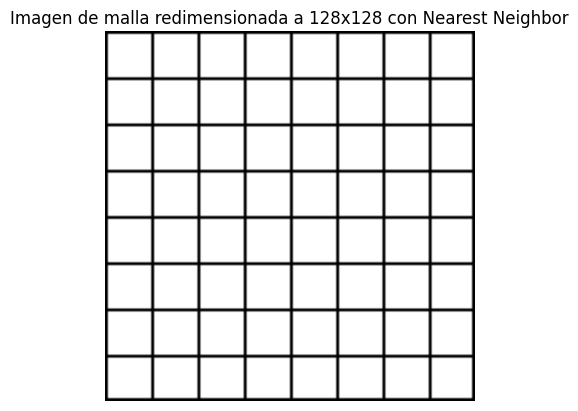

Dimensiones de la imagen redimensionada: (128, 128)


In [12]:
# redimensionar a 128x128 con Nearest Neighbor
imagen_r =  cv2.resize(grid_image, (128,128), interpolation=cv2.INTER_NEAREST)

plt.imshow(imagen_r, cmap='gray')
plt.title("Imagen de malla redimensionada a 128x128 con Nearest Neighbor")
plt.axis('off')
plt.show()

print("Dimensiones de la imagen redimensionada:", imagen_r.shape)

- ¿Cuál es la nueva resolución de la imagen (tamaño del pixel)? ¿Cómo explica este efecto?

    Cuando se hace el submuestreo, la imagen mantiene el tamaño físico original, por ejemplo, $L$ centimetros, pero ahora cada pixel mide el doble que el original. De esta manera:
    - Resolución original: $\frac{L}{256}$ cm/pixel
    - Resolución nueva: $\frac{L}{128}$ cm/pixel

    Este efecto se explica mediante la relación entre el tamaño físico de la imagen y el número de píxeles que la componen. Al reducir el número de píxeles (submuestreo), cada píxel debe abarcar una mayor área física para mantener el mismo tamaño total de la imagen, lo que resulta en un aumento del tamaño del píxel y, por ende, una disminución de la resolución espacial de la imagen. Esto produce una pérdida de detalles en la imagen, "estirando" de alguna manera los pixeles restantes. Si se sigue reduciendo la cantidad de píxeles, este efecto se vuelve más pronunciado, llevando a una imagen cada vez más pixelada, con bordes más evidentes entre los píxeles.

Dimensiones de la imagen redimensionada con Nearest Neighbour: (128, 128)
Dimensiones de la imagen redimensionada con Bilinear: (128, 128)
Dimensiones de la imagen redimensionada con Bicubic: (128, 128)


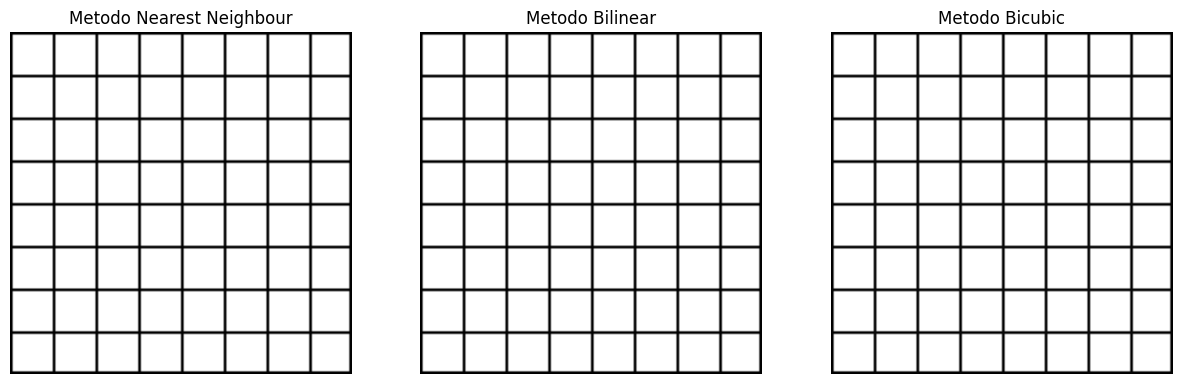

In [16]:
# seleccione tres técnicas de interpolación, incluyendo Nearest Neighbour.
interpolations = {
    "Nearest Neighbour": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC
}
plt.figure(figsize=(15, 5))

# redimensionar la imagen de malla a 128x128 usando las tres técnicas
for i, (interp_name, interp_method) in enumerate(interpolations.items()):
    resized_image = cv2.resize(grid_image, (128, 128), interpolation=interp_method)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Metodo {interp_name}")
    plt.axis('off')
    
    print(f"Dimensiones de la imagen redimensionada con {interp_name}:", resized_image.shape)

- Comente el resultado basado en la apariencia de la imagen y los niveles de gris de sus píxeles. Investigue en qué consisten cada una de estas técnicas de interpolación.

    En esto consisten las técnicas de interpolación usadas:
    - Nearest Neighbor: para determinar el color del nuevo píxel, selecciona el valor del píxel más cercano en la imagen original.
    - Bilinear: calcula el valor del nuevo píxel como una media ponderada de los 2x2 píxeles vecinos más cercanos en la imagen original.
    - Bicubic: calcula el valor del nuevo píxel utilizando un bloque de 4x4 píxeles vecinos, aplicando una interpolación con polinomios cúbicos.

    En términos de la apariencia de la imagen, a pesar de que a este tamaño de redimensión no se alcanzan a ver mayores cambios, podemos concluir que con Nearest Neighbor se observa una imagen ligeramente más pixelada, con los bordes más evidentes entre los píxeles, pues no se crean nuevos valores de gris, sino que se repiten los existentes. Con Bilinear, la imagen se ve un poco más suave, con valores de gris más claros cuando hay transiciones entre los cuadrados y sus bordes negros. Finalmente, con bicubic la imagen se ve aún más suave, con una transición entre los cuadrados y sus bordes más graduales, igualmente con nuevos valores de gris.


Dimensiones de la imagen redimensionada con Nearest Neighbour: (100, 100)
Dimensiones de la imagen redimensionada con Bilinear: (100, 100)
Dimensiones de la imagen redimensionada con Bicubic: (100, 100)


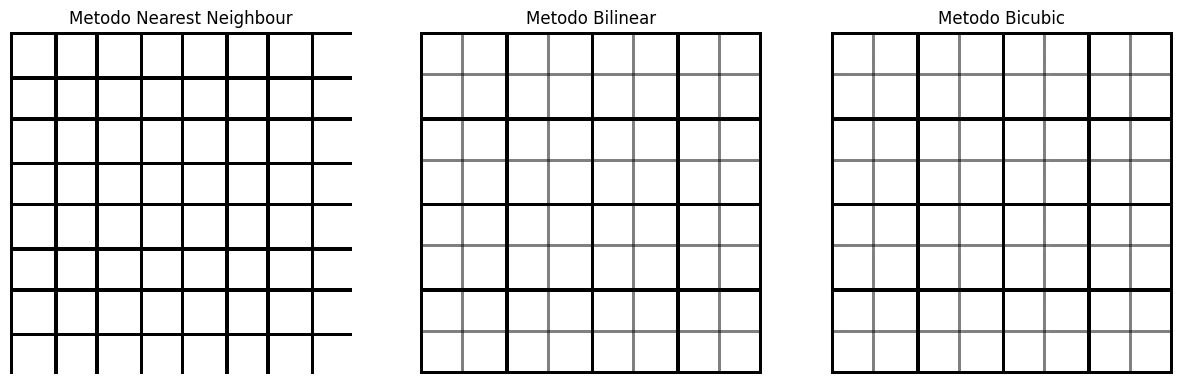

In [17]:
# repetir submestreando la imagen original a 100x100
interpolations = {
    "Nearest Neighbour": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC
}
plt.figure(figsize=(15, 5))

# redimensionar la imagen de malla a 128x128 usando las tres técnicas
for i, (interp_name, interp_method) in enumerate(interpolations.items()):
    resized_image = cv2.resize(grid_image, (100, 100), interpolation=interp_method)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Metodo {interp_name}")
    plt.axis('off')
    
    print(f"Dimensiones de la imagen redimensionada con {interp_name}:", resized_image.shape)

- Qué diferencia observa entre esta imagen y las obtenidas anteriormente.

    En estas imagenes se nota con más claridad los efectos de cada tipo de interpolación: en Nearest Neighbor podemos ver que al tomar los vecinos más cercanos, hay unas líneas que llegan a desaparecer y otras que se vuelven menos o más gruesas con respecto a la imagen original. En el método bilinear, podemos observar que los niveles de gris de algunas de las lineas de la malla toman tonos de gris más claros, debido a la media ponderada de la cuadricula de pixeles 2x2 más cercana. Con el método Bicubic hay poca diferencia visual con respecto al método bilinear.

libpng warning: iCCP: profile 'icc': 'GRAY': Gray color space not permitted on RGB PNG


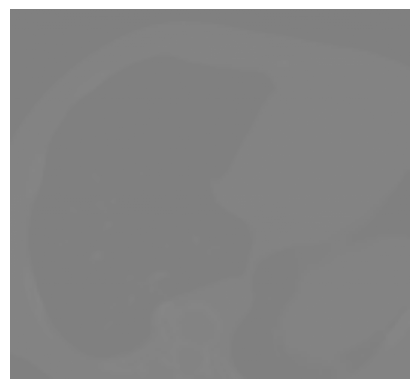

In [19]:
# cargar y visualizar la imagen TORAX
torax_image = read_and_show_image_gray_scale(os.path.join(images_path, "Torax.png"))

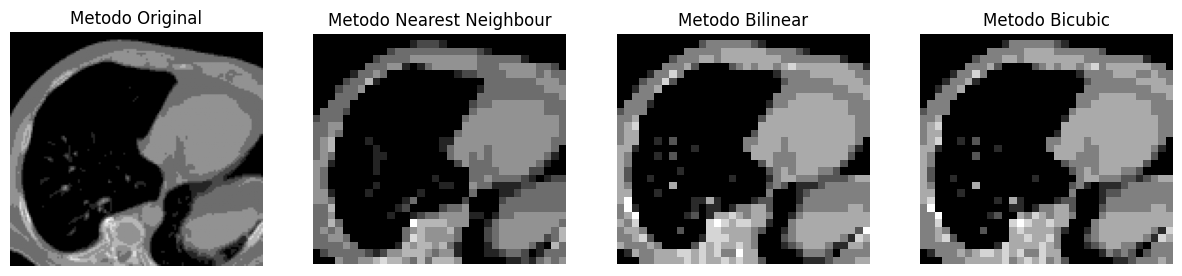

In [23]:
# submuestrear a dimensiones 34x31. Cambiar los diferentes interpoladores del filtro
interpolations = {
    "Original": None,
    "Nearest Neighbour": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC
}

plt.figure(figsize=(15, 5))
for i, (interp_name, interp_method) in enumerate(interpolations.items()):
    if interp_method is None:
        resized_image = torax_image
    else:
        resized_image = cv2.resize(torax_image, (34, 31), interpolation=interp_method)
    
    plt.subplot(1, 4, i+1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Metodo {interp_name}")
    plt.axis('off')
    

- Cuáles son sus conclusiones.

Siguiendo el razonamiento de los puntos anteriores, podemos observar que en Nearest Neighbour hay detalles que se pierden, como pueden ser las pequeñas manchas blancas que aparecen dentro de la figura negra de la imagen torax. En bilinear se crean tonos nuevos especialmente en esas mismas manchas mencionadas anteriormente, y finalmente, con el método bicubic, a pesar de que hay poca diferencia con el metodo bilinear, se puede observar una mejor transición entre tonalidades.

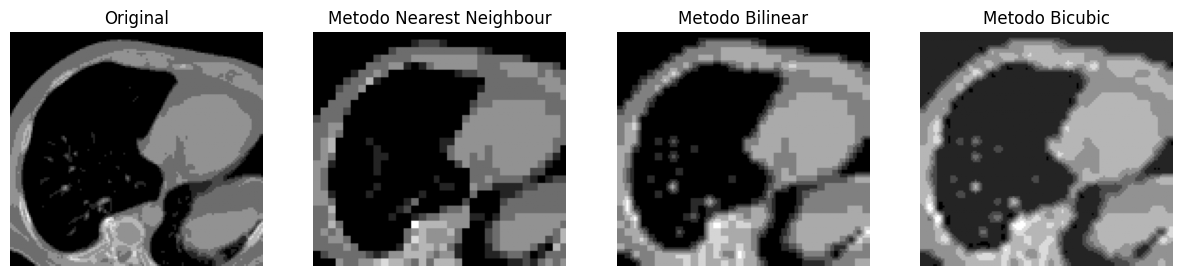

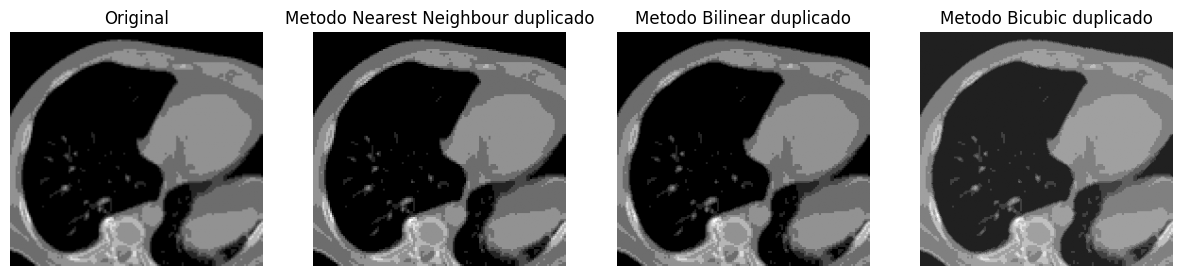

In [36]:
# remuestreo a su tamaño original usando los mismos interpoladores
interpolations = {
    "Original": None,
    "Nearest Neighbour": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC,
}

plt.figure(figsize=(15, 5))
for i, (interp_name, interp_method) in enumerate(interpolations.items()):
    if interp_method is None:
        resized_image = torax_image
        title = "Original"
    else:
        resized_image = cv2.resize(torax_image, (34, 31), interpolation=interp_method)
        resized_image = cv2.resize(resized_image, (torax_image.shape[1], torax_image.shape[0]), interpolation=interp_method)
        title = f"Metodo {interp_name}"
    
    plt.subplot(1, 4, i+1)
    plt.title(title)
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')

# Duplicar la dimensión (numero de filas y collumnas)
plt.figure(figsize=(15, 5))
for i, (interp_name, interp_method) in enumerate(interpolations.items()):
    if interp_method is None:
        resized_image = torax_image
        title = "Original"
    else:
        resized_image = cv2.resize(torax_image, (torax_image.shape[1]*2, torax_image.shape[0]*2), interpolation=interp_method)
        title = f"Metodo {interp_name} duplicado"
    
    plt.subplot(1, 4, i+1)
    plt.title(title)
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')


- ¿Cuál es la nueva resolución de la imagen (tamaño del pixel)? Cómo explica este efecto?

    Cuando se hace el submuestreo seguido por el remuestreo

- Compare la técnica de interpolación Nearest Neighbor con Bicubic haciendo énfasis en el efecto que se observa en los contornos de las diferentes regiones.

    Al comparar ambas técnincas de interpolación, se observa que Nearest Neighbor tiende a producir bordes más abruptos, así como producir una imagen más pixelada, pero mantiene las tonalidades de gris originales. Podemos observar también que se crean unos contornos pixelados alrededor de las regiones con cambio de tonalidad. Por otro lado, Bicubit produce bordes más suaves y transiciones más graduales, reduciendo el efecto pixelado. Con este método podemos observar que hay nuevas tonalidades de gris que no estaban en la imagen original, y además, que los contornos entre regiones se asemejan con más suavidad a los de la imagen original.

- Cuáles son sus conclusiones.

    FALTA

---

    

# 7. Modificación de la paleta de colores


Cree un nuevo notebook.

Genere  una imagen de 256x256x1 con valores entre 255 y 0. Genere una imagen rampa que vaya de negro a blanco de izquierda a derecha. ****Visualice el resultado.

Cargue y visualice las imágenes de trabajo.

Aplique una paleta de colores a cada una de estas 3 imágenes.  Visualice las imágenes resultado y las curvas. Utilice la imagen rampa para entender la distribución de los colores. Comente sus observaciones.

En la imagen scanner.png realice una expansión lineal del contraste, visualice la imagen expandida y su histograma. Aplique a la imagen expandida la misma paleta de colores que utilizó en el punto 4. Visualice la imagen resultado y su histograma.

Guarde los cambios en su notebook.

Compare y comente: 

Imagen original vs imagen expandida (apariencia e histograma).

Imagen original vs imagen expandida con paletas de colores (apariencia e histograma).

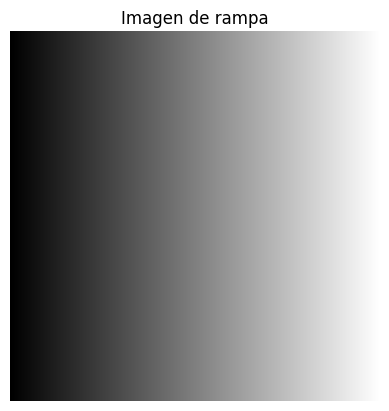

In [42]:
# genere una imagen de 256x256x1 con una rampa que vaya de negro a blanco de izquierda a derecha, visualice el resultado
rampa_image = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))

# visualizar
plt.imshow(rampa_image, cmap='gray')
plt.title("Imagen de rampa")
plt.axis('off')
plt.show()


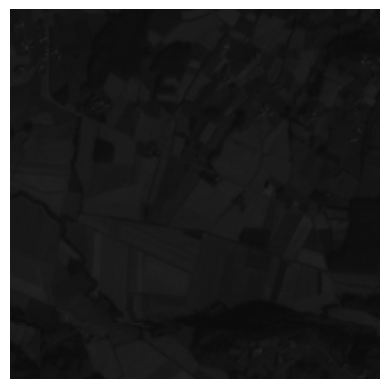

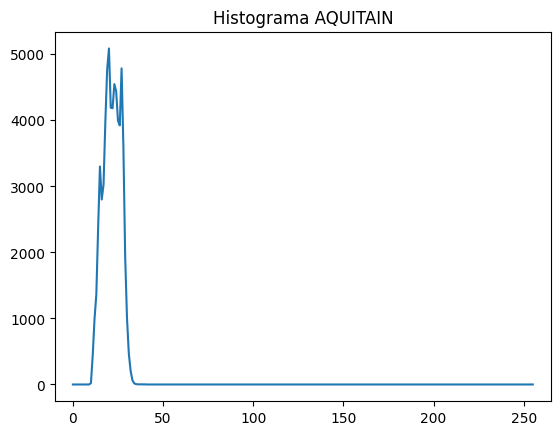

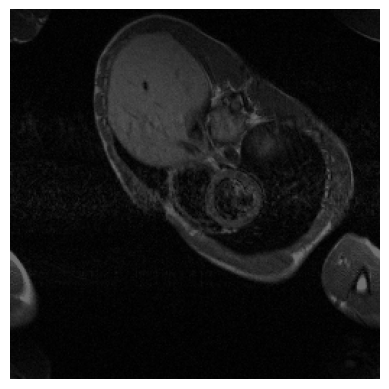

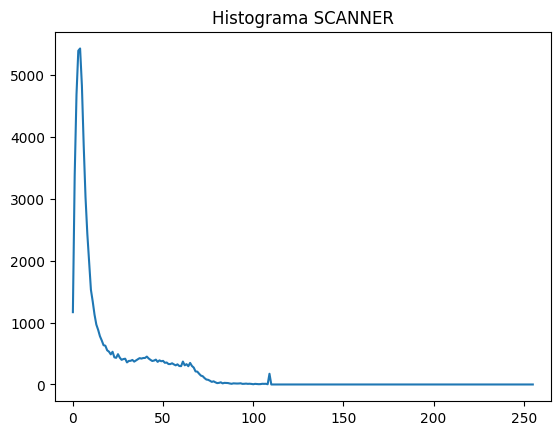

In [70]:
# cargue y visualice las imagenes de trabajo, junto con sus histogramas
aquitain_image = read_and_show_image_gray_scale(os.path.join(images_path, "AQUITAIN.png"))
histogrma_aquitain = calculate_histogram(aquitain_image, hist_title="Histograma AQUITAIN")

scanner_image = read_and_show_image_gray_scale(os.path.join(images_path, "SCANNER.png"))
histogrma_scanner = calculate_histogram(scanner_image, hist_title="Histograma SCANNER")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

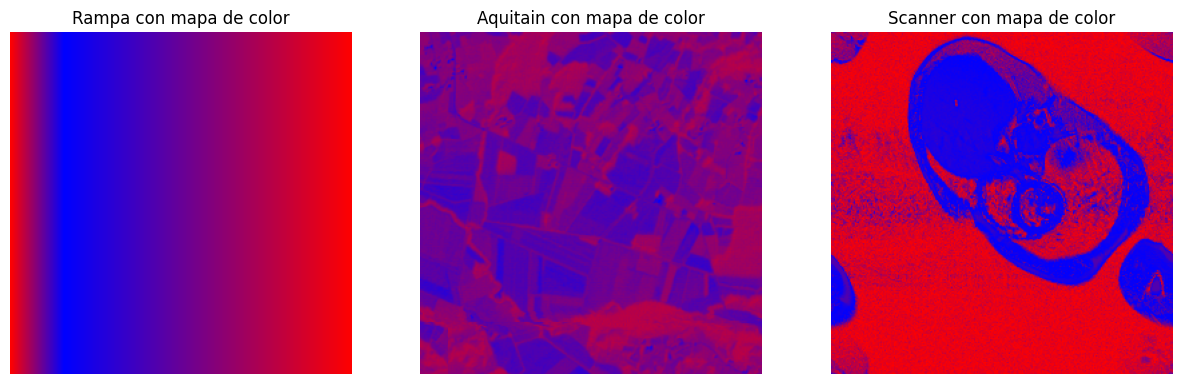

In [87]:
# Aplique una paleta de colores a cada una de estas 3 imágenes.  Visualice las imágenes resultado y las curvas. Utilice la imagen rampa para entender la distribución de los colores. Comente sus observaciones.

# usamos la funcion LUT para aplicar un mapa de color donde se mapea cada tono de gris a un componente específico
# para que sea en tres canales debemos tener una lookup table de 256x1x3

# creamos una look up table que pase de rojo a azul rápidamente hasta el valor de grises 40, y luego de azul a rojo gradualmente desde 40 hasta 255
lut_color = np.zeros((256, 1, 3), dtype=np.uint8)
for i in range(256):
    if i <= 40: # separamos lut en dos partes, antes y despues del valor 40
        # multiplicamos por un factor de cambio para que se haga rápidamente
        val = int(i * (255 / 40))
        lut_color[i, 0, 2] = val # BLUE sube
        lut_color[i, 0, 0] = 255 - val # RED baja
    else:
        # ahora se hace el cambio de BLUE a RED 
        paso = i - 40
        val = int(paso * (255 / 215)) # multiplicamos nuevamente por un factor de cambio
        lut_color[i, 0, 2] = 255 - val # BLUE baja 
        lut_color[i, 0, 0] = val # RED sube despacio
        
    lut_color[i, 0, 1] = 0  # GREEN siempre apagado


# aplicamos el mapa de color a las tres imagenes
dstImage = cv2.LUT(cv2.merge([rampa_image , rampa_image , rampa_image ]), lut_color)
dstAquitain = cv2.LUT(cv2.merge([aquitain_image , aquitain_image , aquitain_image ]), lut_color)
dstScanner = cv2.LUT(cv2.merge([scanner_image , scanner_image , scanner_image ]), lut_color)

# visualizar las imagenes resultado
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(dstImage)
plt.title("Rampa con mapa de color")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dstAquitain)
plt.title("Aquitain con mapa de color")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dstScanner)
plt.title("Scanner con mapa de color")
plt.axis('off')


In [100]:
# creamos una función para plotear el histograma en RGB de una imagen
def calculate_histogram_rgb(image:np.ndarray, hist_title:str = "") -> np.ndarray:
    """
    Calcula el histograma RGB de una imagen y grafica el resultado.

    Parámetros:
    image (numpy.ndarray): Imagen en formato RGB.
    hist_title (str): Título para el gráfico del histograma.

    Retorna:
    histogram (numpy.ndarray): Histograma RGB de la imagen.
    """
    # calcular el histograma para cada canal
    histogram_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    histogram_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    histogram_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    
    # plotear el histograma
    plt.plot(histogram_r, color='r', label='Red Channel')
    plt.plot(histogram_g, color='g', label='Green Channel')
    plt.plot(histogram_b, color='b', label='Blue Channel')
    plt.xlim([-10, 265])
    plt.ylim([-1000, 70000])
    plt.legend()
    if hist_title:
        plt.title(hist_title)
    plt.show()

    return histogram_r, histogram_g, histogram_b

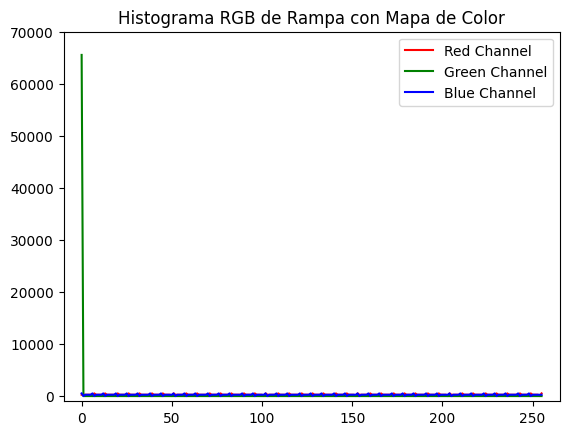

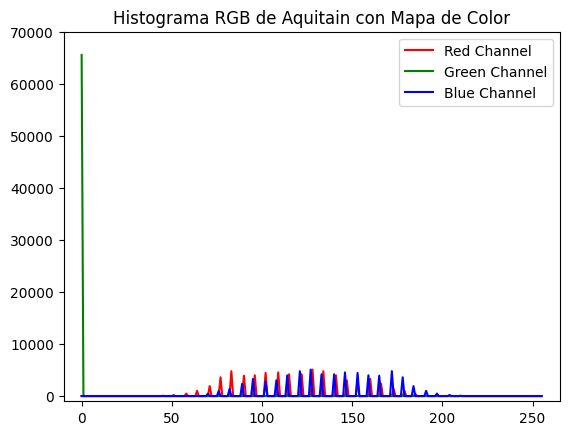

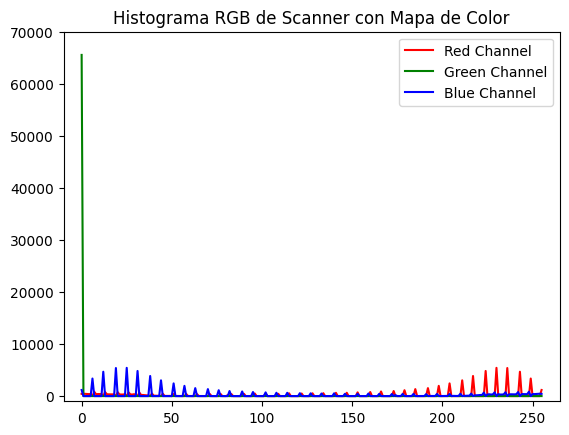

In [101]:
hists_rampa = calculate_histogram_rgb(dstImage, hist_title="Histograma RGB de Rampa con Mapa de Color")
hists_rampa = calculate_histogram_rgb(dstAquitain, hist_title="Histograma RGB de Aquitain con Mapa de Color")
hists_rampa = calculate_histogram_rgb(dstScanner, hist_title="Histograma RGB de Scanner con Mapa de Color")

- Comente sus observaciones.

    En primer lugar, la Look Up Table definida se define haciendo un cambio rápido de tonalidades rojas a azules entre los valores 0 y 40, y luego un cambio de rojo a azul de forma más gradual entre 40 y 255. Esta paleta de colores fue elegida tras visualizar los histogramas originales de las imágenes AQUITAIN y SCANNER, pues notamos que la mayoría de tonos se encuentran alrededor de 0 y 50 aproximadamente. Para conseguir esto, se debe multiplicar el tono por un factor de escalamiento, de manera que llegue en los pasos deseados a los valores máximos de cada canal. Esto porduce picos en los histogramas de los canales rojo y azul, y que no sea en sí un cambio completamente gradual.

    Como podemos notar, la imagen Rampa es muy útil para saber que tonalidad de gris se mapea a que color en RGB. El histograma de  dicha imagen muestra pequeños picos en valores de rojo y azul, pues estos tonos van cambiando de manera uniforme. Con respecto a las imagenes AQUITAIN y SCANNER, podemos observar como la paleta de colores nos muestra con más contraste algunas de las figuras de estas mismas. En el histograma de AQUITAIN, notamos una cantidad de pixeles en tonalidades rojas y azules muy similares imagen se hace evidente con tonalidades más cercanas entre rojo y azul. Por otro lado, en la imagen SCANNER, se evidencian valores más extremos de rojo y de azul, lo cual se puede observar también en su histograma.

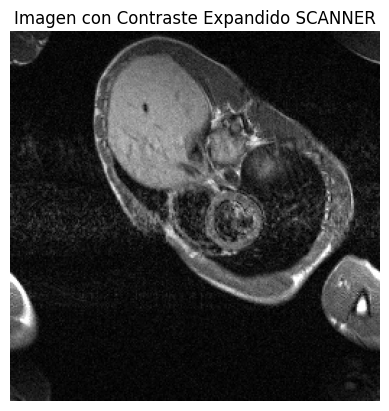

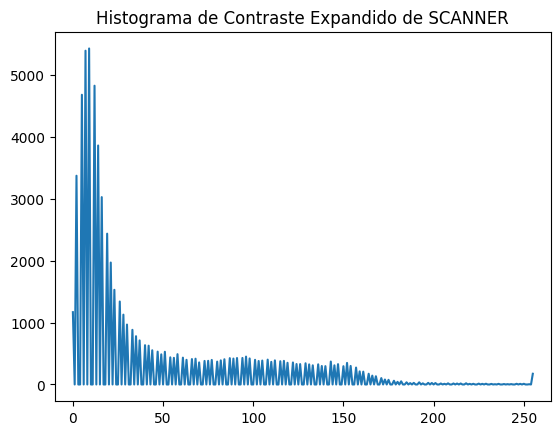

In [102]:
# Expansión lineal del contraste en SCANNER
# mapear valores maximos y minimos en la imagen en grises de forma que tome todo el rango de 0 a 255
expanded_contrast_scanner= cv2.normalize(scanner_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.imshow(expanded_contrast_scanner, cmap='gray')
plt.title("Imagen con Contraste Expandido SCANNER")
plt.axis('off')
plt.show()

# histograma del contraste expandido
expanded_contrast_histogram = calculate_histogram(expanded_contrast_scanner, hist_title="Histograma de Contraste Expandido de SCANNER")

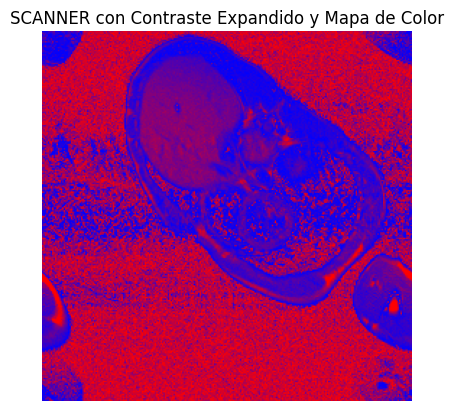

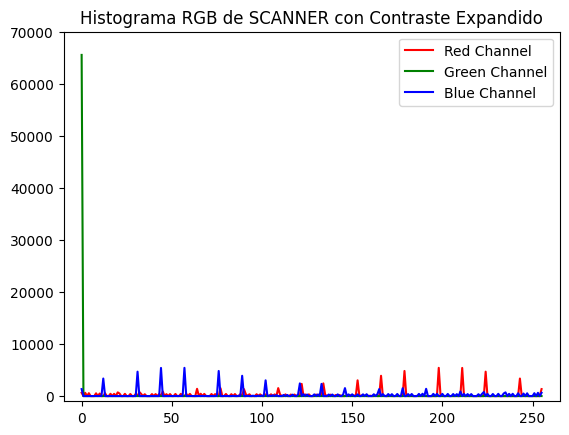

In [103]:
# aplicar la misma paleta
expanded_contrast_scanner_color = cv2.LUT(cv2.merge([expanded_contrast_scanner , expanded_contrast_scanner , expanded_contrast_scanner ]), lut_color)

# visualizar
plt.imshow(expanded_contrast_scanner_color)
plt.title("SCANNER con Contraste Expandido y Mapa de Color")
plt.axis('off')
plt.show()

# histograma RGB
hists_expanded_scanner = calculate_histogram_rgb(expanded_contrast_scanner_color, hist_title="Histograma RGB de SCANNER con Contraste Expandido")

Notamos que, como el mapa de color fue especialmente creado pensando en el histograma original de la imagen, al expandirlo, el "punto de contraste" en el que se había pensado ya no aplica, por lo que hay instancias de la imagen en las que se confunde el fondo con el objeto que aparece.

---

# 7. Ejercicio de síntesis taller 1

En la imagen MUSCLE.png se desea colorear de blanco las figras rojas (representadas por gris oscuro). El resto de la imagen debe quedar inalterada, es decir, las figras rojas quedan blancas, pero lo demás no se altera.

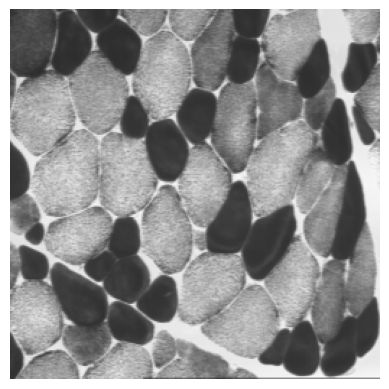

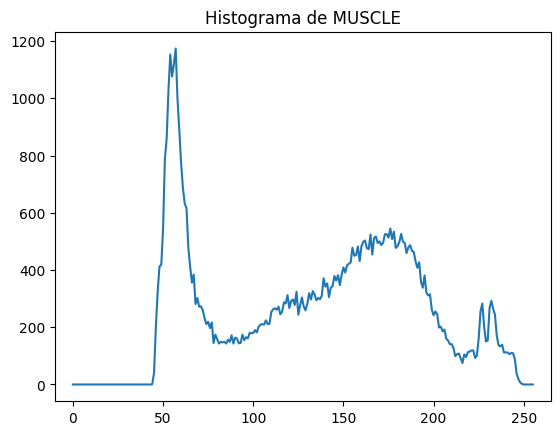

In [145]:
# Cargamos y visualizamos nuevamente la imagen MUSCLE y su histograma
muscle_image = read_and_show_image_gray_scale(os.path.join(images_path, 'MUSCLE.png'))

muscle_histogram =calculate_histogram(muscle_image, hist_title="Histograma de MUSCLE")

Observando el histograma, notamos que hay una clara separación entre las tonalidades más oscuras y las grises. Para resolver el ejercicio se va a buscar el punto de inflexión entre el primer pico y la segunda curva, el cual está entre los valores 60 y 90 aproximadamente.

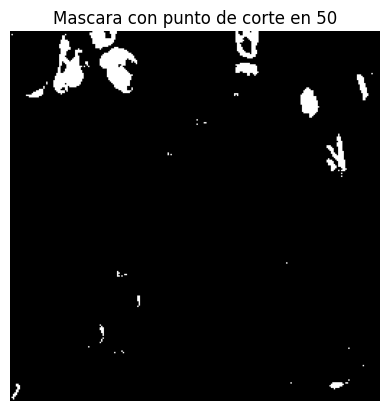

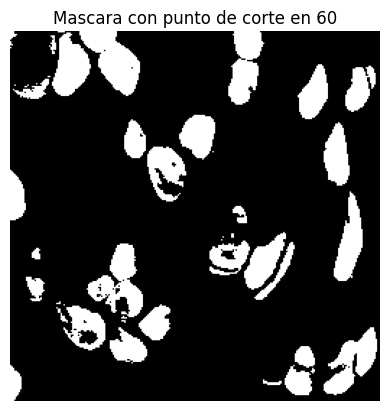

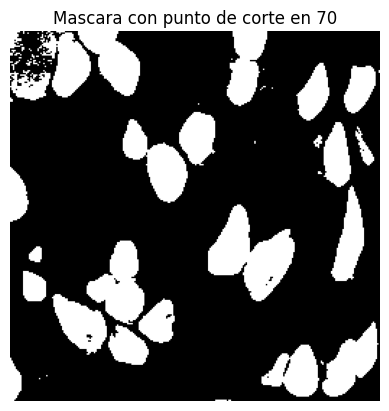

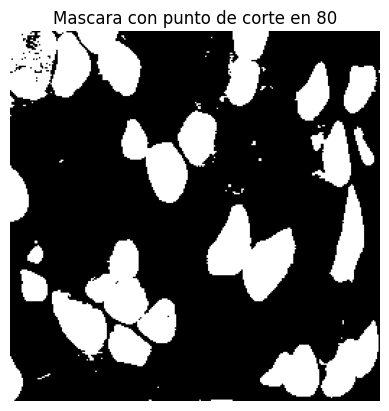

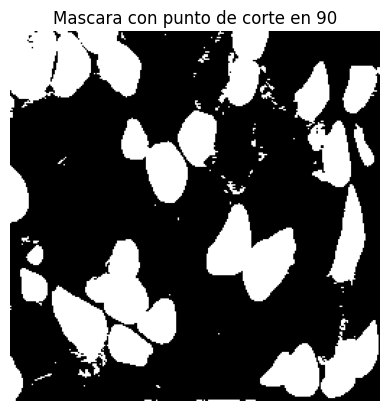

In [165]:
# Buscar punto de corte
valores_por_probar = [i for i in range(50, 91, 10)]

for i in valores_por_probar:
    # crear una mascara binaria, colocando todos los valores de tonos menores al valor de inflexión por probar en False, y el resto en True
    mask = muscle_image <= i
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mascara con punto de corte en {i}")
    plt.axis('off')
    plt.show()

El valor que logra separar mejor las fibras rojas está entre 80 y 90. Tomaremos 90 por facilidad. Lo que resta por hacer, es utilizar la máscara binaria con una operación AND para que cambien únicamente las fibras más oscuras.

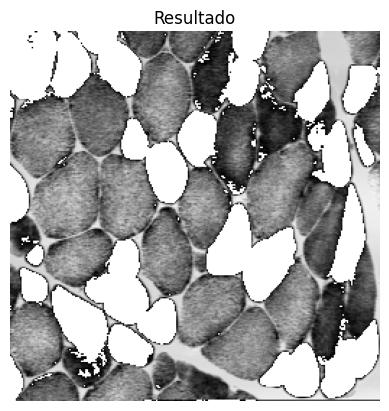

In [154]:
# operacion and con el punto de corte en 90
mask_90 = muscle_image <= 90

# pasamos la mascara de binarios a 0-255
mask_90 = (mask_90.astype(np.uint8)) * 255

# calculamos el resultado como un OR
resultado = cv2.bitwise_or(muscle_image, mask_90)

# visualizamos
plt.imshow(resultado, cmap='gray')
plt.title(f"Resultado")
plt.axis('off')
plt.show()

---

# Ejercicio de bono

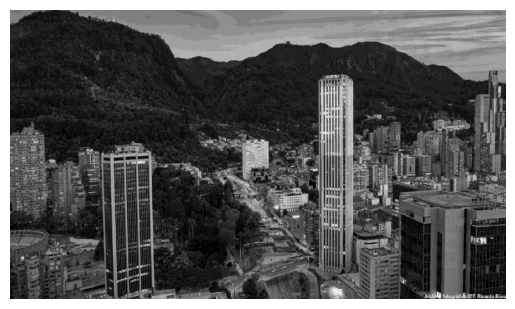

In [156]:
# leer la imagen
imagen_bogota = read_and_show_image_gray_scale(os.path.join(images_path, "ImagenBogota.png")) 

Plano 0


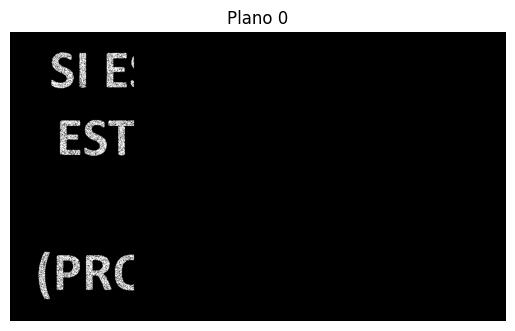

Plano 1


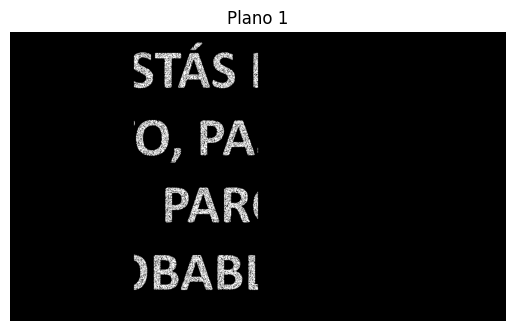

Plano 2


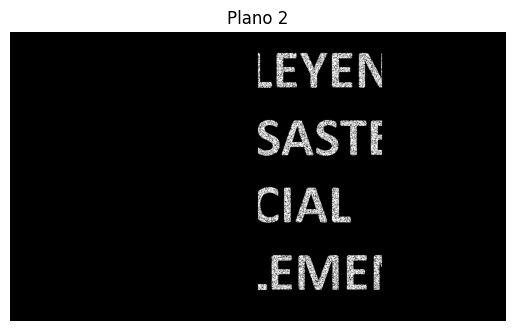

Plano 3


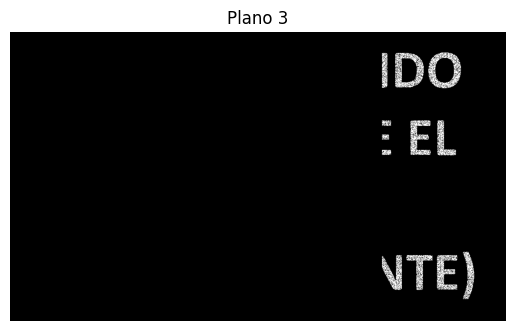

Plano 4


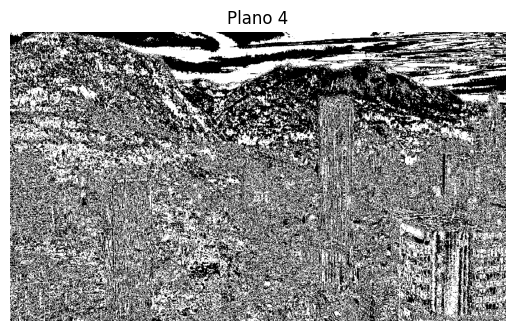

Plano 5


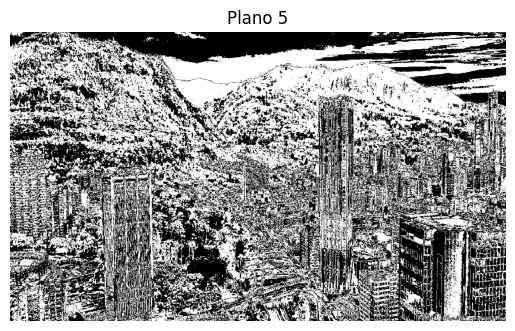

Plano 6


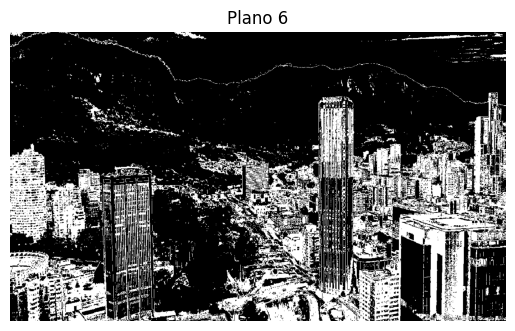

Plano 7


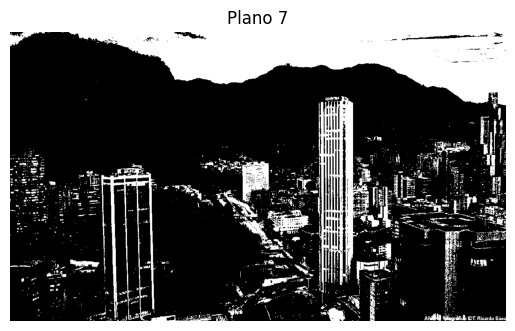

In [157]:
# Visualizaar las capas binarias de 0 a 7
for i in range(8):
    print(f"Plano {i}")
    plane = bit_plane_slicing(imagen_bogota, i)
    plt.imshow(plane, cmap='gray')
    plt.title(f"Plano {i}")
    plt.axis('off')
    plt.show()

El mensaje fue oculto entre los planos 0 a 3. Podemos unirlos con una operación OR.

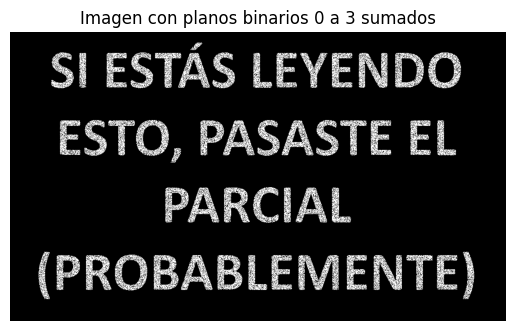

In [164]:
imagen_completa = np.zeros(imagen_bogota.shape, dtype=np.uint8)
for i in range(0, 4):
    plane = bit_plane_slicing(imagen_bogota, i)
    # pasar el plano a 255 cuando no es 0
    plane[plane > 0] = 255
    imagen_completa = cv2.bitwise_or(imagen_completa, plane)
    
plt.imshow(imagen_completa, cmap='gray')
plt.title(f"Imagen con planos binarios 0 a 3 sumados")
plt.axis('off')
plt.show()